# Decision Trees in Python

### Import Libraries

In [5]:
import pandas as pd

### Get The Data. Load data "spambase_data.csv" (balanced dataset i.e. equal no. of spam and non spam classes.)

In [6]:
df = pd.read_csv('spambase_data.csv',header = None)
df.head() # used to display top 5 rows

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### Train and Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df[df.columns[:-1]]
Y = df[len(df.columns)-1]

#### Obtain X_train, X_test, Y_train, Y_test by splitting the dataset into 70-30 ratio with a random state value 30.

Note: random_state is used to control the shuffling in the split of the dataset.

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 30)

### Decision Trees

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

### Prediction and Evaluation

In [12]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [13]:
predictions = dtree.predict(X_test)

In [14]:
print(classification_report(Y_test,predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions))
print("\n Accuracy")
print(accuracy_score(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       863
           1       0.89      0.86      0.88       518

    accuracy                           0.91      1381
   macro avg       0.90      0.90      0.90      1381
weighted avg       0.91      0.91      0.91      1381

Confusion Matrix
[[807  56]
 [ 71 447]]

 Accuracy
0.9080376538740044


### Tree Visualization 

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,16), dpi=1024)
tree.plot_tree(dtree)
# fig.savefig('decision_tree.png')

#### Q1: Create a decision stump and find the majority class in the dataset

[Text(167.4, 163.07999999999998, 'X[51] <= 0.083\ngini = 0.481\nsamples = 3220\nvalue = [1925, 1295]'),
 Text(83.7, 54.360000000000014, 'gini = 0.263\nsamples = 1833\nvalue = [1548, 285]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.396\nsamples = 1387\nvalue = [377, 1010]')]

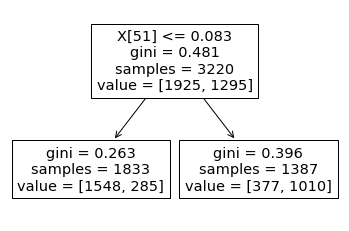

In [18]:
#### Code here ####
dtree = DecisionTreeClassifier(max_depth = 1)
dtree.fit(X_train,Y_train)
tree.plot_tree(dtree)

In [19]:
#### Majority class ####
# X[51] <= 0.083

#### Q2: Implement the decision tree classifier using entropy to measure the quality of split and random state value as 30. 
Note: The features are always randomly permuted at each split, the best found split may vary across different runs. To obtain a deterministic behaviour during fitting, random state has to be fixed to an integer.

In [20]:
#### Code here ####
dtree = DecisionTreeClassifier(criterion = "entropy", random_state = 30)
dtree.fit(X_train,Y_train)
predictions = dtree.predict(X_test)
print(classification_report(Y_test,predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions))
print("\n Accuracy")
print(accuracy_score(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       863
           1       0.90      0.86      0.88       518

    accuracy                           0.91      1381
   macro avg       0.91      0.90      0.90      1381
weighted avg       0.91      0.91      0.91      1381

Confusion Matrix
[[814  49]
 [ 75 443]]

 Accuracy
0.9102099927588704


#### Q3: Compare the two trees on the basis of their accuracy. Which tree gives better accuarcy (using gini index or entropy).

In [21]:
#### Write your answer here ####
# entropy

#### Q4: Fully grown decision trees models usually overfits the data. To overcome the problem of overfitting, pruning techniques are used. One of which is restricting the height of the tree. Find the value of the height for which the decision tree model is giving the highest accuracy. (Use entropy measure)

In [24]:
#### Code here ####
dtree = DecisionTreeClassifier(criterion = "entropy", random_state = 30)
dtree.fit(X_train,Y_train)
maxDepth = dtree.get_depth()
depth = maxDepth
acc = accuracy_score(Y_test, dtree.predict(X_test))
for i in range(1, maxDepth):
    dtree = DecisionTreeClassifier(criterion = "entropy", random_state = 30, max_depth = i)
    dtree.fit(X_train, Y_train)
    a = accuracy_score(Y_test, dtree.predict(X_test))
    if acc < a:
        acc = a
        depth = dtree.get_depth()
print(depth)

18


#### Q5: Find the feature importance from the trained model and rebuild the model using top 10 important features only. 

In [33]:
#### Code here ####
dtree = DecisionTreeClassifier(criterion = "entropy", random_state = 30)
dtree.fit(X_train,Y_train)
imp = dtree.feature_importances_

In [52]:
features, indices = [], []
for i, v in enumerate(imp):
    features.append((i,v))
features = sorted(features, key = lambda tup: tup[1], reverse = True)[0:10]
for i, v in features:
    indices.append(i)
print(indices)

[51, 55, 6, 24, 52, 15, 54, 18, 26, 4]


In [69]:
X_new = X[[i for i in indices]]
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.30, random_state = 30)
dtree = DecisionTreeClassifier(criterion = "entropy", random_state = 30)
dtree.fit(X_train,Y_train)
predictions = dtree.predict(X_test)
print(classification_report(Y_test,predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions))
print("\n Accuracy")
print(accuracy_score(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       863
           1       0.86      0.80      0.83       518

    accuracy                           0.87      1381
   macro avg       0.87      0.86      0.86      1381
weighted avg       0.87      0.87      0.87      1381

Confusion Matrix
[[793  70]
 [104 414]]

 Accuracy
0.8740043446777698


#### Q6: Is there any information loss in the tree created above

In [70]:
#### Write your answer here ####
# yes a bit

#### Q7: Create 5 different random vectors of size 10 each to select the attributes from the dataset. Create 5 decision trees using the selected set of attributes in each case and calculate their accuracy.

In [1]:
#### Code here ####
#import random
#for j in range(5):
#    indices = random.sample([i for i in range(len(X.columns))],10)
#    print(indices)
#    X_new = X[[i for i in indices]]
#    X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.30, random_state = 30)
#    dtree = DecisionTreeClassifier(criterion = "entropy", random_state = 30)
#    dtree.fit(X_train,Y_train)
#    predictions = dtree.predict(X_test)
#    print(classification_report(Y_test,predictions))
#    print("Confusion Matrix")
#    print(confusion_matrix(Y_test,predictions))
#    print("\n Accuracy")
#    print(accuracy_score(Y_test,predictions))

#### Q8: Is there any decision tree you will discard and why?

In [72]:
#### Write your answer here ####
# fifth one

#### Q9: Load data "spambase_data_2.csv". Create a decision tree using entropy. Perform its evaluation. (unbalanced dataset i.e. equal no. of spam and non spam classes.)

In [74]:
#### Code here ####
df = pd.read_csv('spambase_data_2.csv',header = None)
X = df[df.columns[:-1]]
Y = df[len(df.columns)-1]
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.30, random_state = 30)
dtree = DecisionTreeClassifier(criterion = "entropy", random_state = 30)
dtree.fit(X_train,Y_train)
predictions = dtree.predict(X_test)
print(classification_report(Y_test,predictions))
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions))
print("\n Accuracy")
print(accuracy_score(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1083
           1       0.51      0.49      0.50       298

    accuracy                           0.79      1381
   macro avg       0.69      0.68      0.68      1381
weighted avg       0.79      0.79      0.79      1381

Confusion Matrix
[[944 139]
 [152 146]]

 Accuracy
0.7892831281679942


#### Q10. Perform pre- pruning by restricting the height of tree and find the height at which you get highest accuracy.

In [82]:
#### Code here ####
dtree = DecisionTreeClassifier(criterion = "entropy", random_state = 30)
dtree.fit(X_train,Y_train)
maxDepth = dtree.get_depth()
depth = maxDepth
acc = accuracy_score(Y_test, dtree.predict(X_test))
for i in range(1, maxDepth):
    dtree = DecisionTreeClassifier(criterion = "entropy", random_state = 30, max_depth = i)
    dtree.fit(X_train, Y_train)
    a = accuracy_score(Y_test, dtree.predict(X_test))
    if acc < a:
        acc = a
        depth = dtree.get_depth()
print(depth, a)

24 0.7871107892831282


#### Q11: Is there any difference between precision and accuracy you get in Q4 and Q10.

In [83]:
#### Write your answer here ####
# question 10 lesser